# Shells 2D

## Init symbols for *sympy*

In [159]:
from sympy import *
from sympy.vector import CoordSys3D
N = CoordSys3D('N')
x1, x2 = symbols("x_1 x_2")
alpha1, alpha2 = symbols("alpha_1 alpha_2")
R, L, ga, gv = symbols("R L g_a g_v")
init_printing()

## Cylindrical coordinates

In [160]:
a1 = pi / 2 + (L / 2 - alpha1)/R

x = R * cos(a1)
y = R * sin(a1)

r = x*N.i + y*N.j

#### Curve in 2D coordinates system will be defined with the following vector $\vec{r}=\vec{r(\alpha_1)}$

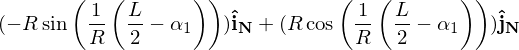

In [161]:
r

#### Tangent to curve

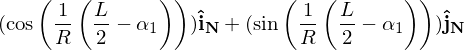

In [162]:
v_temp = r.diff(alpha1)
dr_len = v_temp.magnitude()
v = v_temp / dr_len
v = trigsimp(v)
v_temp

In [163]:
trigsimp(dr_len)

#### Normal to curve

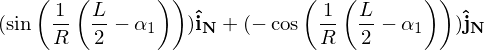

In [164]:
n_temp = v.diff(alpha1)
k=trigsimp(n_temp.magnitude())
n = n_temp/k
q=1/(R*sqrt(1/R**2))
n = trigsimp(n).subs(q, 1)
n

In [165]:
v.dot(n)

In [166]:
n.dot(v)

#### Curvature

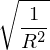

In [167]:
sympify(k)

#### Base Vectors $\vec{R}_1, \vec{R}_2$

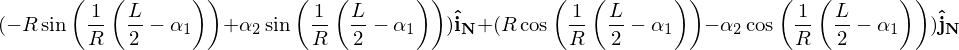

In [168]:
R_alpha=r+alpha2*n
R_alpha

In [169]:
R1=R_alpha.diff(alpha1)
R2=R_alpha.diff(alpha2)

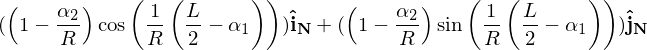

In [170]:
trigsimp(R1)

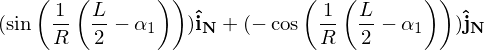

In [171]:
R2

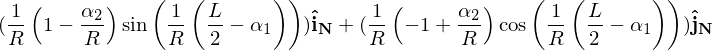

In [172]:
trigsimp(R1.diff(alpha1))

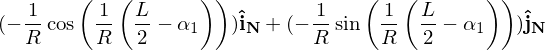

In [173]:
trigsimp(R1.diff(alpha2))

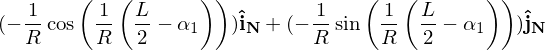

In [174]:
trigsimp(R2.diff(alpha1))

In [175]:
trigsimp(R2.diff(alpha2))

#### Derivative of base vectors
Let's find 
$\frac { d\vec{n} } { d\alpha_1}$
$\frac { d\vec{v} } { d\alpha_1}$
$\frac { d\vec{n} } { d\alpha_2}$
$\frac { d\vec{v} } { d\alpha_2}$

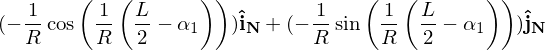

In [176]:
n.diff(alpha1)

$ \frac { d\vec{n} } { d\alpha_1} = -\frac {1}{R} \vec{v} = -k \vec{v} $

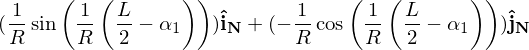

In [177]:
v.diff(alpha1)

$ \frac { d\vec{v} } { d\alpha_1} = \frac {1}{R} \vec{n} = k \vec{n} $

#### Derivative of vectors

$ \vec{u} = u_v \vec{v} + u_n\vec{n} $

$ \frac { d\vec{u} } { d\alpha_1} =  \frac { d(u_v\vec{v}) } { d\alpha_1} + \frac { d(u_n\vec{n}) } { d\alpha_1} = 
 \frac { du_n } { d\alpha_1} \vec{n} + u_n \frac { d\vec{n} } { d\alpha_1} + \frac { du_v } { d\alpha_1} \vec{v} + u_v \frac { d\vec{v} } { d\alpha_1} = \frac { du_n } { d\alpha_1} \vec{n} - u_n k \vec{v} + \frac { du_v } { d\alpha_1} \vec{v} + u_v k \vec{n}$

Then
$ \frac { d\vec{u} } { d\alpha_1} = \left( \frac { du_v } { d\alpha_1} - u_n k \right) \vec{v} + \left( \frac { du_n } { d\alpha_1} + u_v k \right) \vec{n}$

$ \frac { d\vec{u} } { d\alpha_2} = \frac { d(u_n\vec{n}) } { d\alpha_2} + \frac { d(u_v\vec{v}) } { d\alpha_2} = 
 \frac { du_n } { d\alpha_2} \vec{n} + u_n \frac { d\vec{n} } { d\alpha_2} + \frac { du_v } { d\alpha_2} \vec{v} + u_v \frac { d\vec{v} } { d\alpha_2} = \frac { du_n } { d\alpha_2} \vec{n} + \frac { du_v } { d\alpha_2} \vec{v} $

#### Let's find Jacobi matrix:

$ A = \left( 
\begin{array}{cc} 
\frac{\partial x_1}{\partial \alpha_1} & \frac{\partial x_1}{\partial \alpha_2} \\
\frac{\partial x_2}{\partial \alpha_1} & \frac{\partial x_2}{\partial \alpha_2}
\end{array} 
\right)$

$ \left[
\begin{array}{cc} 
\vec{e}_1 & \vec{e}_2
\end{array} 
\right] = \left[
\begin{array}{cc} 
\vec{R}_1 & \vec{R}_2
\end{array} 
\right] \cdot  \left( 
\begin{array}{cc} 
\frac{\partial x_1}{\partial \alpha_1} & \frac{\partial x_1}{\partial \alpha_2} \\
\frac{\partial x_2}{\partial \alpha_1} & \frac{\partial x_2}{\partial \alpha_2}
\end{array} 
\right) = \left[
\begin{array}{cc} 
\vec{R}_1 & \vec{R}_2
\end{array} 
\right] \cdot A$

$ \left[
\begin{array}{cc} 
\vec{R}_1 & \vec{R}_2
\end{array} 
\right] = \left[
\begin{array}{cc} 
\vec{e}_1 & \vec{e}_2
\end{array} 
\right] \cdot A^{-1}$

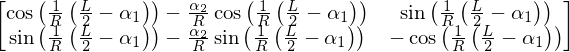

In [178]:
m11=R1.dot(N.i)
m12=R2.dot(N.i)
m21=R1.dot(N.j)
m22=R2.dot(N.j)
A=Matrix([[m11, m12], [m21, m22]])
A

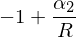

In [179]:
trigsimp(A.det())

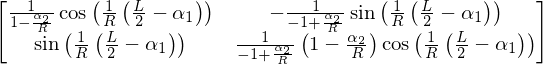

In [180]:
A_inv = trigsimp(A**-1)
sympify(A_inv)

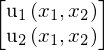

In [181]:
u1 = Function("u_1")
u2 = Function("u_2")
u_x=Matrix([u1(x1,x2), u2(x1,x2)])
u_x

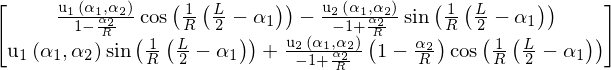

In [182]:
u_alpha = A_inv*u_x.subs(x1, alpha1).subs(x2, alpha2)
u_alpha

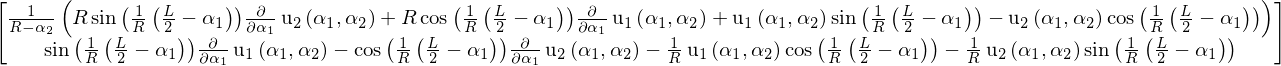

In [183]:
trigsimp(u_alpha.diff(alpha1))

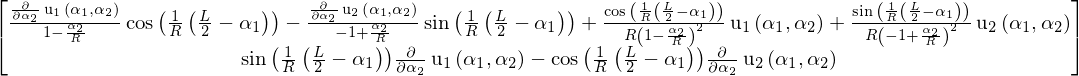

In [184]:
trigsimp(u_alpha.diff(alpha2))

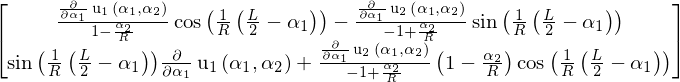

In [185]:
A_inv*u.diff(alpha1)

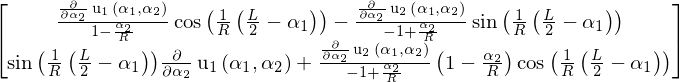

In [186]:
A_inv*u.diff(alpha2)

In [187]:
def contraction2D(A,B):
    res = A[0,0]*B[0,0]
    for i in range(0,2):
        for j in range(0,2):
            if (i != 0 or j != 0):
                res += A[i,j]*B[j,i]
    return res


In [188]:
e11 = Function("e_{11}")
e12 = Function(r"e_{12}")
e21 = e12
e22 = Function(r"e_{22}")
e=Matrix([[e11(x1,x2), e12(x1,x2)], [e21(x1,x2), e22(x1,x2)]])
s11 = Function("s_{11}")
s12 = Function(r"s_{12}")
s21 = s12
s22 = Function(r"s_{22}")
s=Matrix([[s11(x1,x2), s12(x1,x2)], [s21(x1,x2), s22(x1,x2)]])

E=contraction2D(s, e)
E

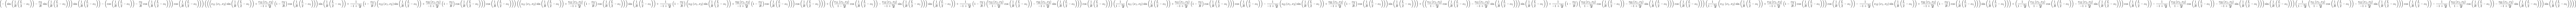

In [205]:
e_alpha=A_inv*e*A_inv.T
s_alpha=A_inv*s*A_inv.T
E_alpha=contraction2D(s_alpha, e_alpha)*A.det()
E_alpha

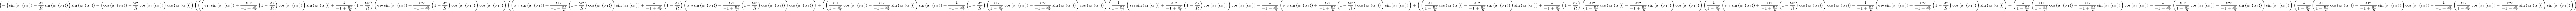

In [208]:
e11_s = Symbol("e_{11}")
e12_s = Symbol("e_{12}")
e22_s = Symbol("e_{22}")
s11_s = Symbol("s_{11}")
s12_s = Symbol("s_{12}")
s22_s = Symbol("s_{22}")
a1_alpha = Function("a_1")
E_alpha_s = E_alpha.subs(e11(x1,x2),e11_s).subs(e12(x1,x2),e12_s).subs(e21(x1,x2),e12_s).subs(e22(x1,x2),e22_s)
E_alpha_s = E_alpha_s.subs(s11(x1,x2),s11_s).subs(s12(x1,x2),s12_s).subs(s21(x1,x2),s12_s).subs(s22(x1,x2),s22_s)

aa=S(1)/R*(L/2 - alpha1)
E_alpha_s = E_alpha_s.subs(aa,a1_alpha(alpha1))
E_alpha_s




In [210]:
E_alpha_s = trigsimp(sympify(E_alpha_s))

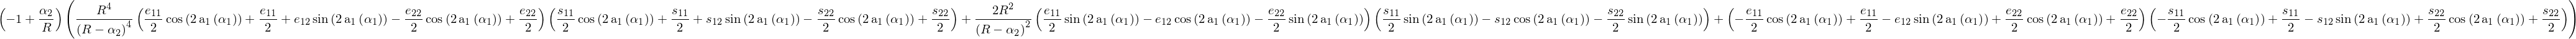

In [211]:
q=Function('q')
E_alpha_s.subs(A.det(), q(alpha2))
E_alpha_s

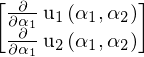

In [192]:
dud1=u.diff(alpha1)
dud1

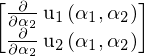

In [193]:
dud2=u.diff(alpha2)
dud2

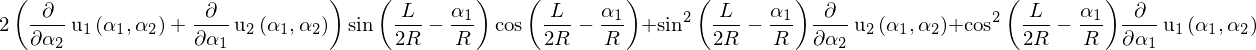

In [194]:
(m*e*m.T)[0,0].expand().subs(e[0,0], dud1[0]).subs(e[0,1], dud1[1]+dud2[0]).subs(e[1,0], dud1[1]+dud2[0]).subs(e[1,1], dud2[1])
